## Task- 11 (EDA)

### 1.Introduction
<p>A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.</p>

#### 1.1 Data Description
<p>This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over 50 a year. </p>

#### 1.2 Feature Description
<p>1. Categorical Attributes
<ul>
<li>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</li>
Individual work category
<li>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</li>
Individual's highest education degree
<li>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</li>
Individual marital status
<li>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</li>
Individual's occupation
    <li>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</li>
Individual's relation in a family
    <li>race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</li>
Race of Individual
    <li>sex: Female, Male.</li>
<li>native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.</li>
</ul>
2. Continuous Attributes
<ul>
    <li>age: continuous.</li>
Age of an individual
    <li>fnlwgt: final weight, continuous.</li>
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
    <li>capital-gain: continuous.</li>
    <li>capital-loss: continuous.</li>
    <li>hours-per-week: continuous.</li>
Individual's working hour per week

### 2. Fetching Data

#### 2.1 Import packages

In [1]:
# import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats

#### 2.2 Import Data

In [2]:
data=pd.read_csv(r"C:\Users\DEBLEENA\OneDrive\Desktop\adult.csv")
data.shape

(48842, 15)

<p> This shows we have 48842 data and 15 attributes with target attribute (income column).

In [3]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


<p> In this data we can see there are some missing values in form of '?' in 'workclass','occupation','native country'.

In [4]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
data_num=data.copy()

### 3. Data Cleaning

In [6]:
# fixing commom null values
attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country'] == '?'] = most_freq_attrib 

<ipython-input-6-d210ebad50ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass'][data['workclass'] == '?'] = most_freq_attrib
<ipython-input-6-d210ebad50ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['occupation'][data['occupation'] == '?'] = most_freq_attrib
<ipython-input-6-d210ebad50ce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['native-country'][data['native-country'] == '?'] = most_freq_attr

In [7]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [8]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


### 4. Summary
#### 4.1 Summary statistics for numerical attributes

In [9]:
data_num = data.drop(["educational-num","income"], axis=1)
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


#### 4.2 Summary and count for categorical attributes

In [10]:
# this pull out object data types
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


<p> From this we can see 'native-country' has the most unique values i.e. 41 categories

### 5. EDA

### 5.1 Univariant Analysis

### 1. AGE

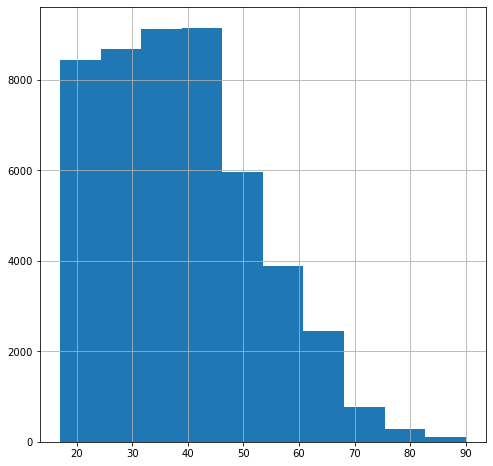

In [11]:
# distribution
data['age'].hist(figsize=(8,8))
plt.show()

<p><b>Observation</b> 
    <ul>
        <li>'age' column is not symmetric</li>
        <li>it is right skewed</li>
        <li>minimum and maximum age are 17 and 90 respectively</li>

### 2. hours-per-week

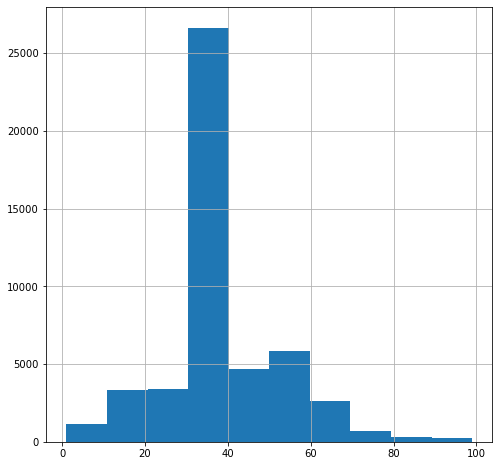

In [12]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

<p><b>Observation</b>
    <ul>
        <li>Data varies from the range of 1 to 99</li>
        <li>Most people works 30-40 hours per week, they are roughly 27,000</li>
        <li>Very few people works 80-99 hours per week around 20 people</li>

### 3.fnlwgt
fnlwgt means weight of observation

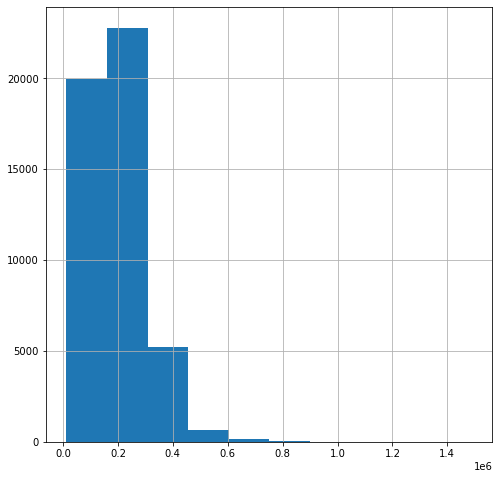

In [13]:
data['fnlwgt'].hist(figsize=(8,8))
plt.show()

<p><b>Obseravtion</b>
    <ul>
        <li>this is sampling weight corresponding to observation</li>
        <li>this obseravtion is right-skewed</li>

### 4. Capital-gain

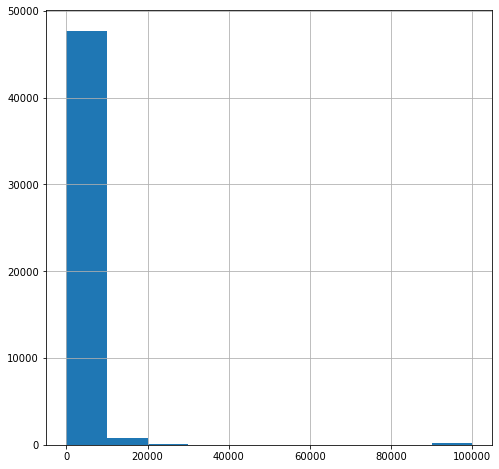

In [14]:
data['capital-gain'].hist(figsize=(8,8))
plt.show()

<p><b>Obseravtion</b>
    <ul>
        <li>This histogram shows capital-gain most centered on 0 and few on 99k-100k

### 5. Capital-loss

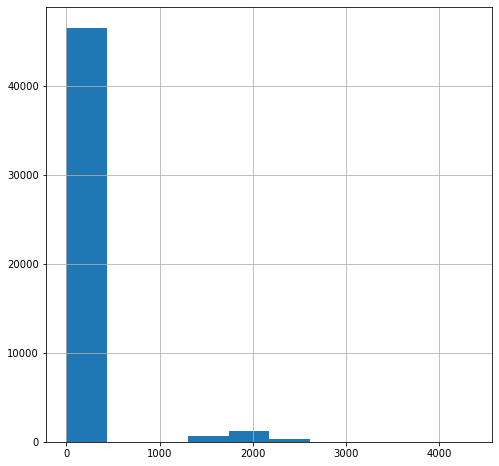

In [15]:
data['capital-loss'].hist(figsize=(8,8))
plt.show()

<p><b>Obseravtion</b>
    <ul>
        <li>This histogram shows capital-loss most values centred at 0 and few are 2282.</li>

#### Obseravtion between capital-gain and capital-loss

C:\Users\DEBLEENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


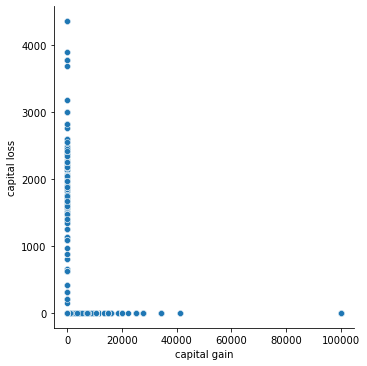

In [16]:
sns.relplot('capital-gain','capital-loss',data=data)
plt.xlabel('capital gain')
plt.ylabel('capital loss')
plt.show()

<p><b>Observation</b>
    <ul>
        <li>Both capital gain and capital loss can be zero</li>
        <li>If capital gain is zero there is probablity that capital loss can be high</li>
        <li>If capital loss is zero there is probablity that capital gain can be high</li>

### 6.Workclass(categorical)

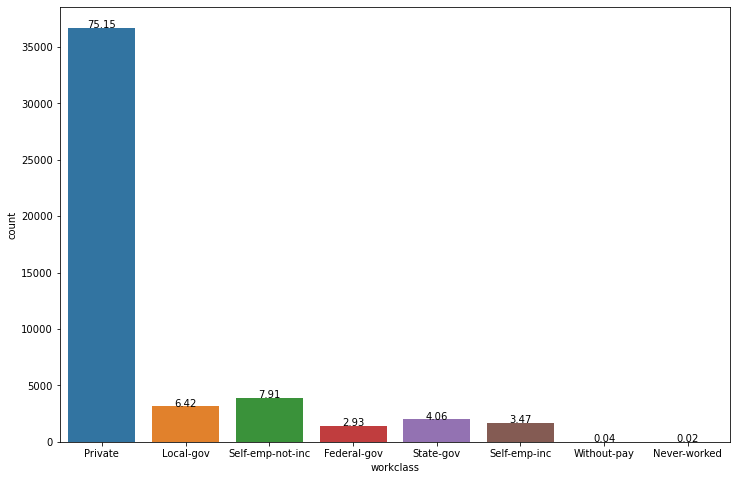

In [17]:
# distribution
plt.figure(figsize=(12,8))

total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<p><b>Observation</b>
    <ul>
        <li>There are 8 unique values</li>
        <li>Most of them belong to class private (75.15)</li>
        <li>without-pay and never-worked has minimum count(less than 1%)</li>
        

### 4. Education

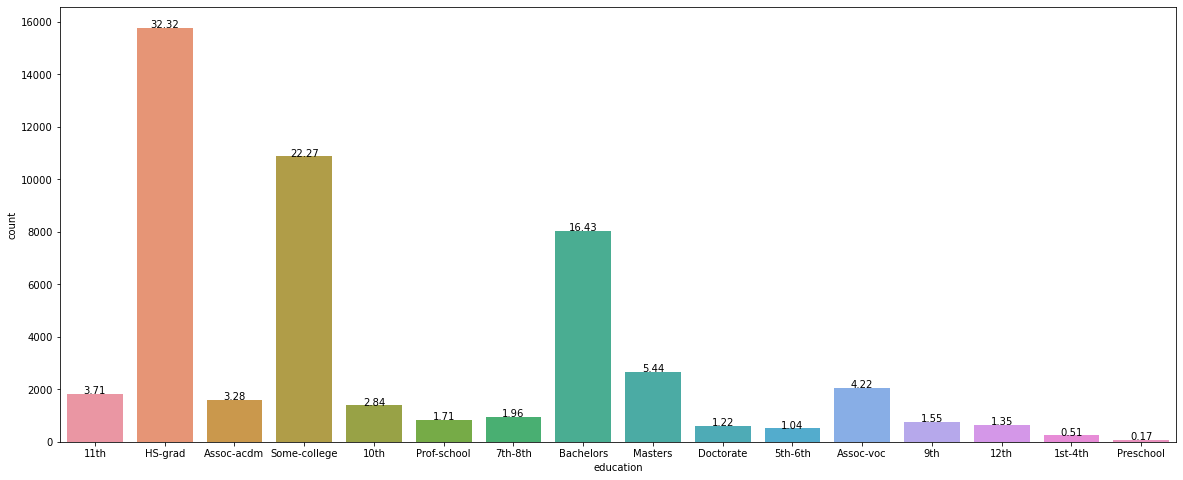

In [18]:
plt.figure(figsize=(20,8))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<p><b>Observation</b>
    <ul>
        <li>There are 16 unique categories of education column</li>
        <li>HS-grad has the highest value i.e. 32.32%</li>
        <li>Preschool has minimum samples</li>

### 5. Marital-status

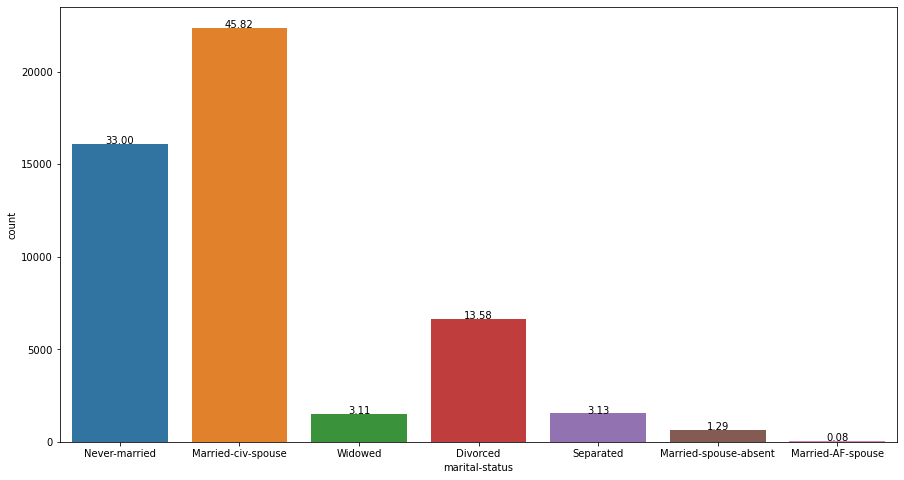

In [19]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="marital-status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<p><b>Observation</b>
    <ul>
        <li>This marital-status has 7 unique categories</li>
        <li>Married-civ-spouse has maximum samples</li>
        <li>Never-married attribute has minimum samples</li>

### 6. Occupation

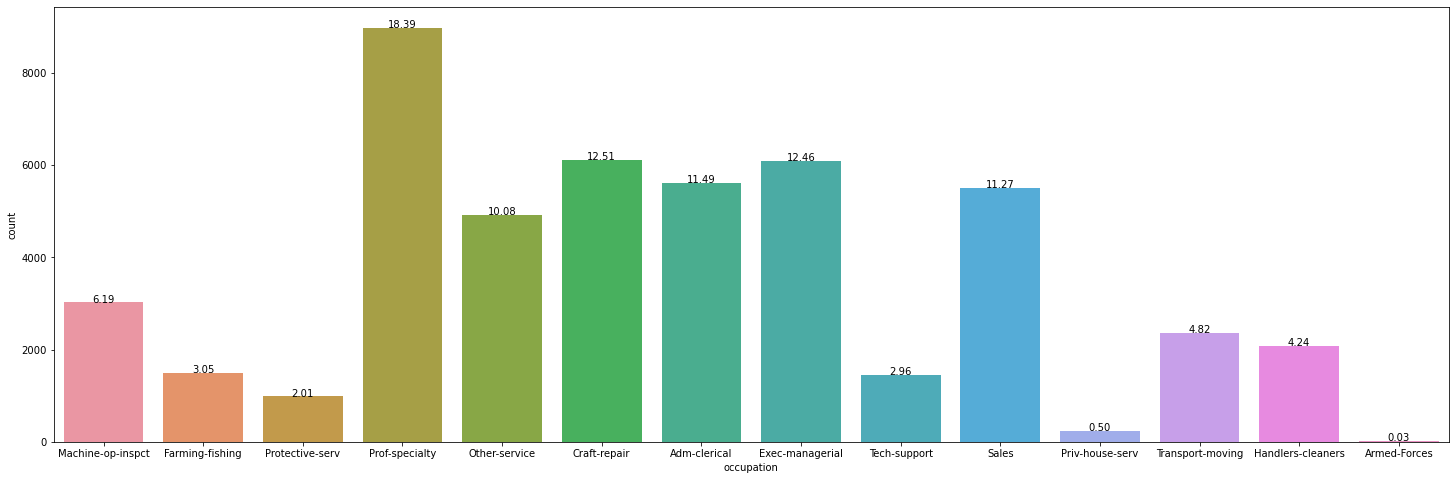

In [20]:
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<p><b>Observation</b>
    <ul>
        <li>There are 14 unique values of occupation attribute</li>
        <li>Pro-specify as maximum number of samples</li>
        <li>Armed-forces as minimum number of samples</li>

### 7. Relationship

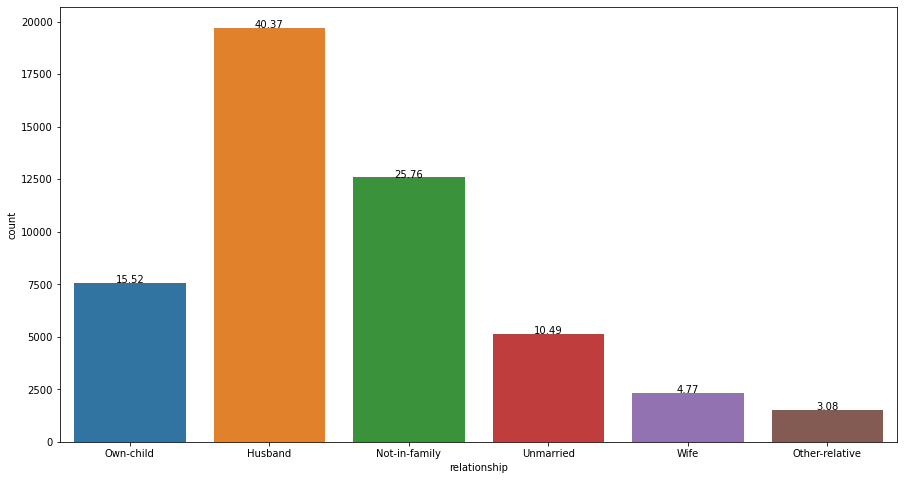

In [21]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<p><b>Observation</b>
    <ul>
        <li>There are 6 unique values of relationship attribute</li>
        <li>Husband has maximum number of samples(40.37)</li>

### 8. Race

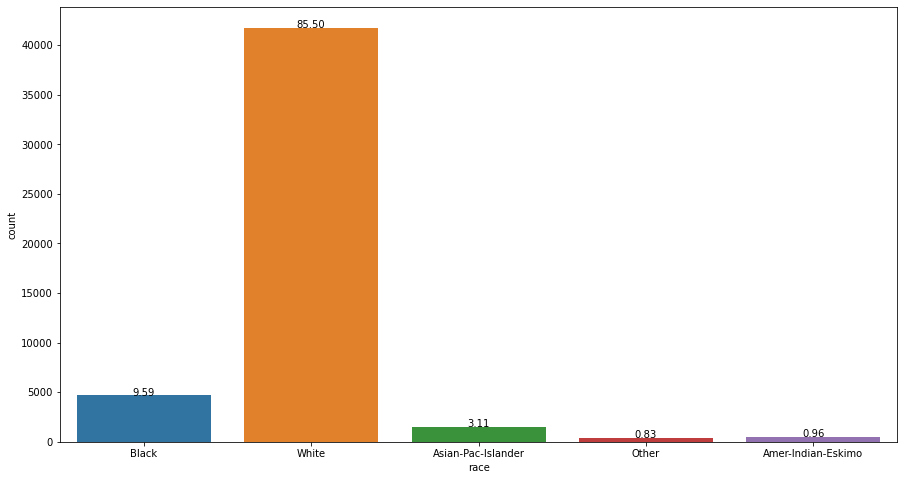

In [22]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<p><b>Observation</b>
    <ul>
        <li>There are 5 unique categories</li>
        <li>Most of them are white which is 85.50</li>

### 9. Gender

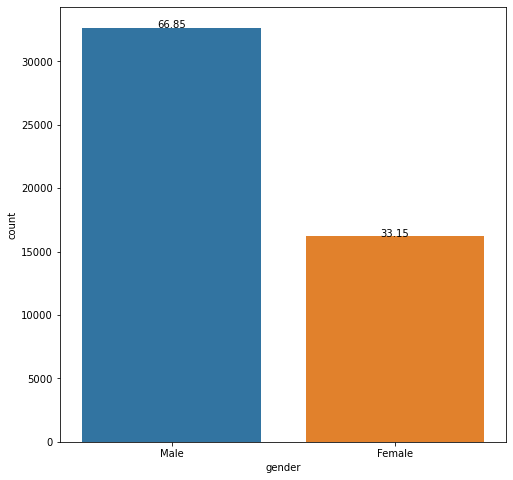

In [23]:
plt.figure(figsize=(8,8))
total = float(len(data) )

ax = sns.countplot(x="gender", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<p><b>Observation</b>
    <ul>
        <li>Gender has 2 categories(male and female)</li>
        <li>Frequency of male is higher than female</li>

### 10.Native-country

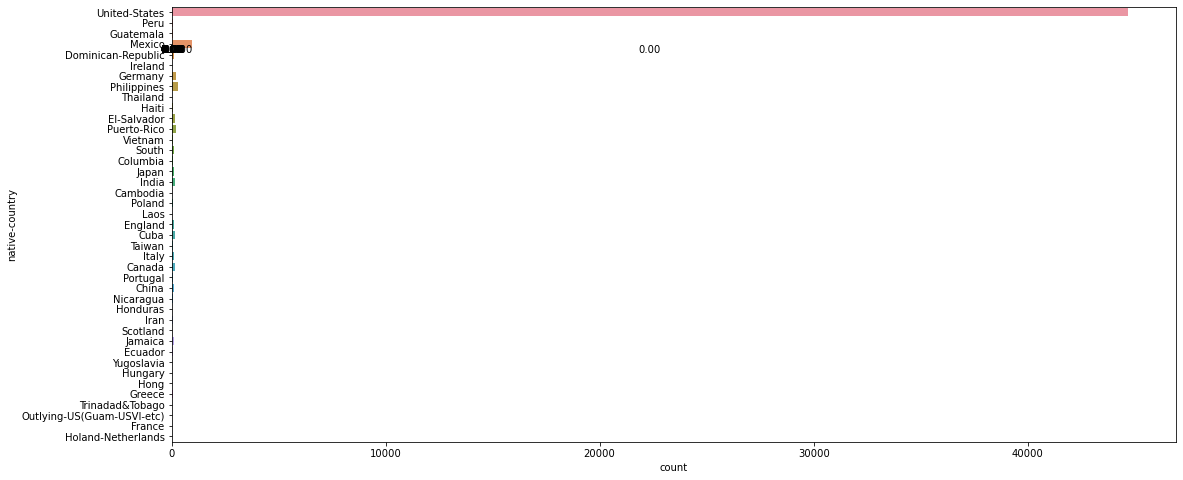

In [24]:
plt.figure(figsize=(18,8))
total = float(len(data) )

ax = sns.countplot(y="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<p><b>Obseravation</b>
    <ul>
        <li>This data is taken from US</li>
        <li>91.5% is from America and others are immigrants</li>

### 11.Income(Target variable)

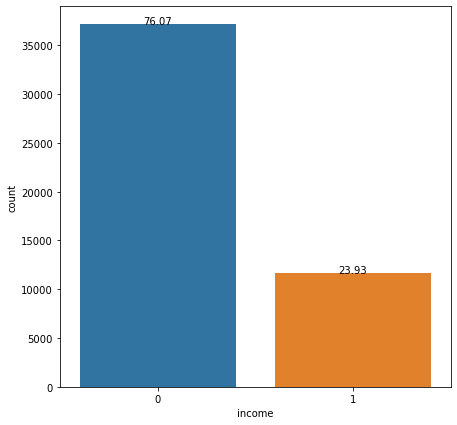

In [25]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<p><b>Observation</b>
    <ul>
        <li>This dataset is not balanced</li>
        <li>23.93 belongs to group 1 (who has income more than 50k) and 76.07% belongs to group 0 (who has income less than 50k)</li>

### 5.2 Bivariate Analysis
### 1. Age
#### i. Boxplot( Relationship with income)

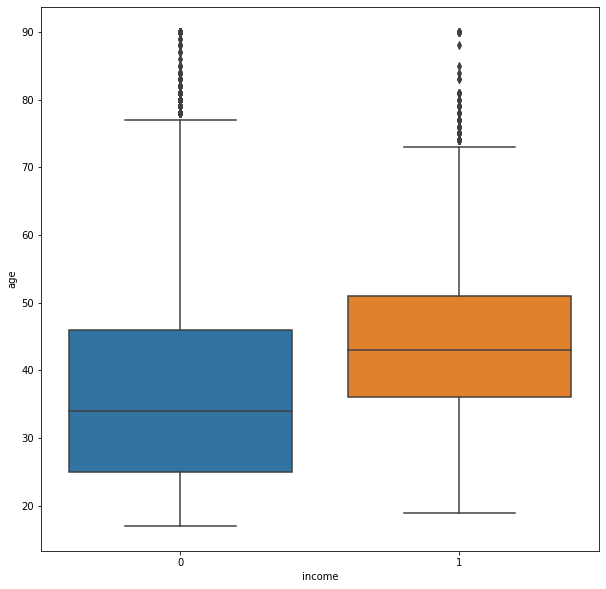

In [26]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [27]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.275178
0,0,36.872184


<p>The mean 'age' for income group(<=50k) is 36.87 and for income group (>50k) is 44.27</p>

#### ii. Description about boxplot
<p>The above bivarite boxplot shows:
    <ul>
        <li>Outliers present in both income group wrt age column</li>
        <li>Income group (>50K) has greater mean than income group (<=50k)</li>

#### iii. Hypothesis Testing(relationship between income and age)
<p><ul>
    <li>Null Hypothesis :- there is no difference in Mean age of income group >50k and income group <=50k.</li>
<li>Alternate Hypothesis :- there is difference in Mean age of income group >50k and income group <=50k.</li>


In [28]:
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

income_1 = data[data['income']==1]['age']
income_0 = data[data['income']==0]['age']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [29]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 2.832590602103307
p value 0.005132508613698989
we reject null hypothesis


Using statistical analysis,

We can conclude that there is a significant difference in the mean ages of income group >50k and income group <=50k.
It means that age has some contribution to the distinguish income groups.

### 2. Hours per week
#### i. Boxplot (relationship with income)

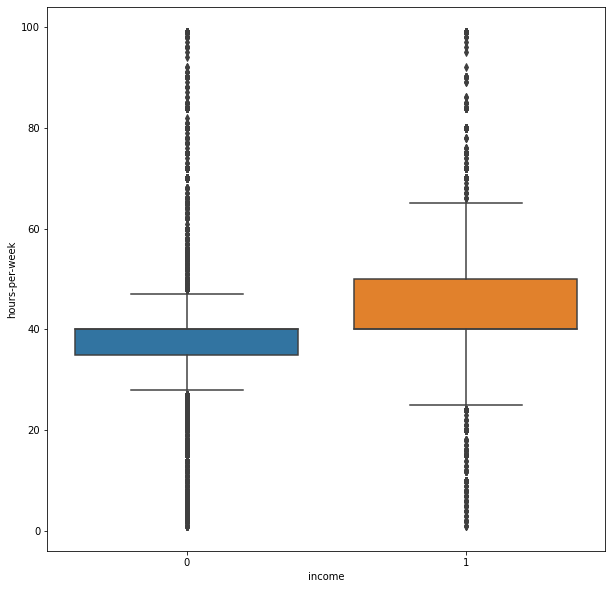

In [30]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

#### ii. Describtion about boxplot
Bivariate Analysis with the boxplot shows that:

The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.

Interpretation
<ul>
    <li>Income group who earns >50k has spend ~44 "hours-per-week".(long hours)</li>
    <li>Income group who earns <=50k has spend ~37 "hours-per-week".</li>

#### iii. Hypothesis Testing (to check the relationship between hours per week and income)
<p> <ul>
    
<li>Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.</li>
<li>Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.</li>

In [31]:
data = data[(np.abs(stats.zscore(data["hours-per-week"])) < 3)] 

income_1 = data[data['income']==1]["hours-per-week"]
income_0 = data[data['income']==0]["hours-per-week"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',format(pval, '.70f'))

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 4.540718752625135
p value 0.0000097386441581508266176906221667231022820487851276993751525878906250
we reject null hypothesis


#### iv. Final conclusion
Using statistical analysis with the help of two sample t-test,

We can conclude that there is difference in Mean of income group >50k and income group <=50k.
It means that hours-per-week has some contribution to the distinguish income groups.


### 3. fnlwgt
#### i. Boxplot (relationship with income)

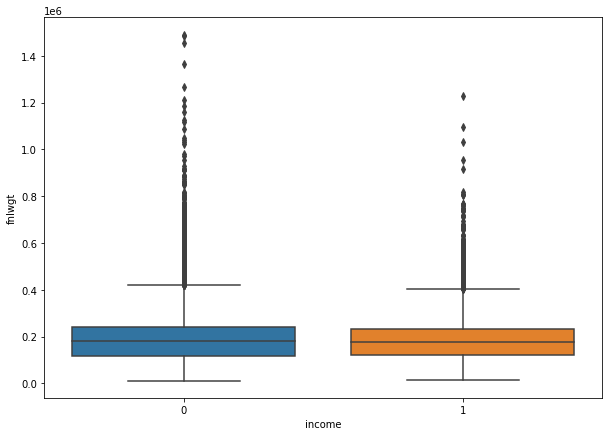

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=data)
plt.show()

#### ii. Description about boxplot
<ul>
    <li>As evident from the above plot, both income group has nearly same IQR and median is centered on 0.</li>
    <li>Outliers are present in both the income groups.</li>
<li>It seems that the boxplot for final weight w.r.t income groups is similar except the number of outliers in income group who earns <=50k is more.</li>

#### iii. Hypothesis Testing (to check relationship between fnlwgt and income)
<ul>
<li>Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.</li>
<li>Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.</li>

In [33]:
data = data[(np.abs(stats.zscore(data["fnlwgt"])) < 3)] 

income_1 = data[data['income']==1]["fnlwgt"]
income_0 = data[data['income']==0]["fnlwgt"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest -0.7644568139982243
p-value 0.4455476460268035
we accept null hypothesis


#### iv. Final Conclusion

Using statistical analysis with the help of two sample t-test,
<ul>
<li>We can conclude that there is no difference in Mean of income group >50k and income group <=50k.</li>
    <li>It means that final weight has no contribution to the distinguish income group.</li>

### 4. Capital gain
#### i. Boxplot ( Relationship with income)

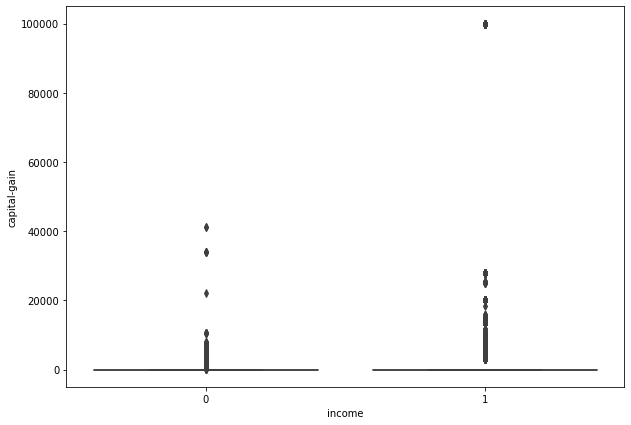

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-gain", data=data)
plt.show()

#### ii. Description about boxplot
This boxplot tells us that:

Most of the capital gains value is accumulated at 0 for both the income group .

#### iii. Hypothesis Testing (to check the relationship between capital gain and income)
<ul>
<li>Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.</li>
<li>Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.</li>

In [35]:
data = data[(np.abs(stats.zscore(data["capital-gain"])) < 3)] 

income_1 = data[data['income']==1]["capital-gain"]
income_0 = data[data['income']==0]["capital-gain"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.880005923148923
p-value 0.00016163957106364818
we reject null hypothesis


#### iv. Final conclusion
Using statistical analysis with the help of two sample t-test,

We can conclude that there is difference in Mean of income group >50k and income group <=50k.

### 5. Capital loss
#### i. Boxplot (relationship with income)

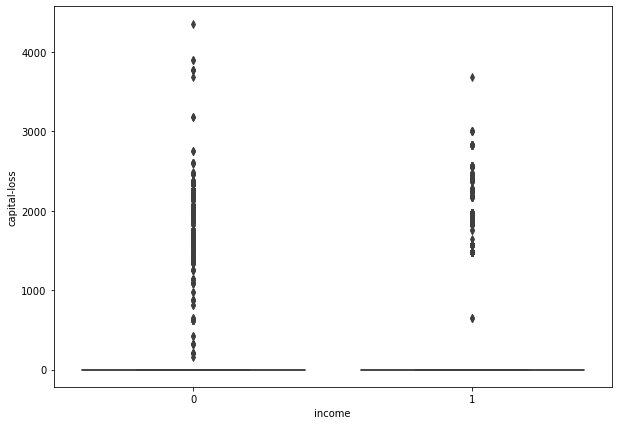

In [36]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-loss", data=data)
plt.show()

#### ii. Description about boxplot
This boxplot is similar to the capital gain boxplot where most of the values are concentrated on 0.

#### iii. Hypothesis Testing (to check relationship between capital loss and income)
<ul>
    <li>Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.</li>
<li>Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.</li>

In [37]:
income_1 = data[data['income']==1]["capital-loss"]
income_0 = data[data['income']==0]["capital-loss"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.6528211521598686
p-value 0.0003988955362347183
we reject null hypothesis


#### iv. Final Conclusion
Using statistical analysis with the help of two sample t-test,

We can conclude that there is no difference in Mean capital loss of income group >50k and income group <=50k.
It means that capital-loss is unable to seperate the income groups.

### 6. Workclass
#### i. Plot (relationship with income)

posx and posy should be finite values
posx and posy should be finite values


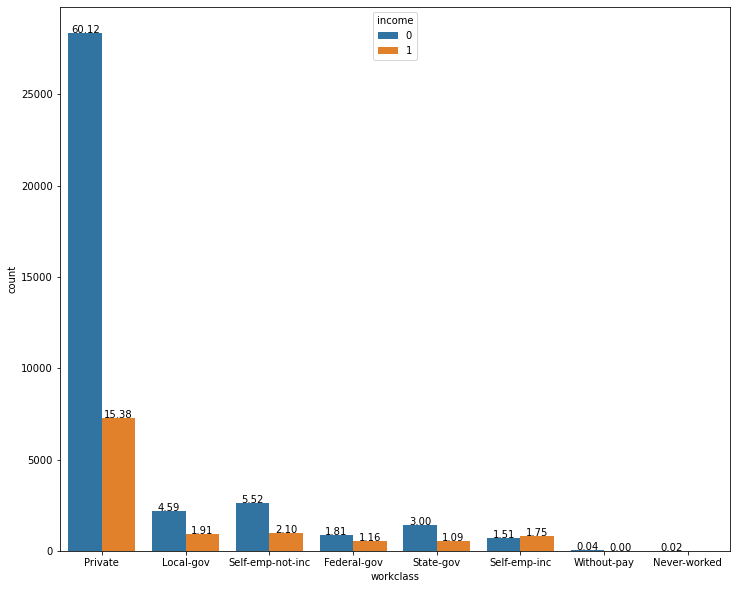

In [38]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### ii. Description about plot
This plot shows that:
<ul>
    <li>In private workclass most of the people(59.48%) earn <=50k(belong to income group 0).</li>
    <li>self-emp-inc workclass is only where more people earn >50k(belong to income group 1).</li>
    <li>In Federal-gov workclass nearly more than half of the people earn >50k.</li>

#### iii. Hypothesis Testing (to check the realtionship between worksclass and income)
<ul>
<li>H0(Null Hypothesis) : There is no relationship between workclass and income.</li>
    <li>H1(Alternate Hypothesis) : There is a relationship between workclass and income.</li>

In [39]:
# contingency table
c_t = pd.crosstab(data['workclass'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t


income,0,1
workclass,,
Local-gov,7,2
Private,56,12
Self-emp-inc,2,3
Self-emp-not-inc,4,2
State-gov,3,3


In [40]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
p_value 0.10332814807609494
[[ 6.89361702  2.10638298]
 [52.08510638 15.91489362]
 [ 3.82978723  1.17021277]
 [ 4.59574468  1.40425532]
 [ 4.59574468  1.40425532]]
probability=0.950, critical=9.488, stat=7.697
Independent (fail to reject H0)


#### iv. Final Conclusion
With the help of Chi-Squared test,

As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "workclass" attribute on the target variable "income

### 7. Education
#### i. Plot (relationship with income)

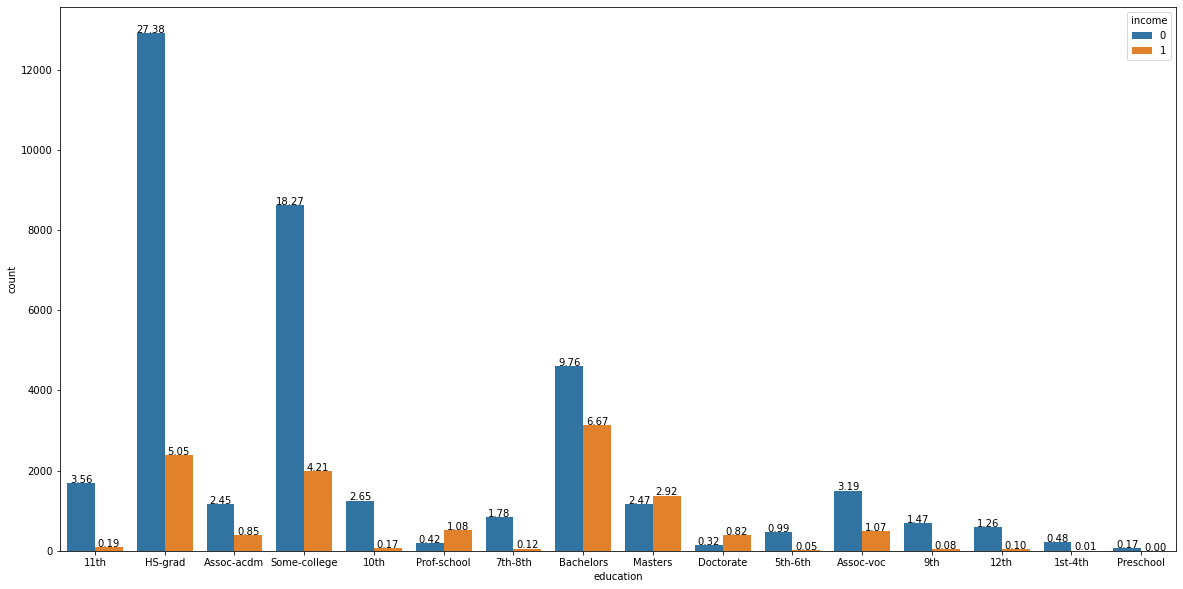

In [41]:
plt.figure(figsize=(20,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### ii. Description about plot
This plot shows that:

Despite the fact that most of the categories fall under the HS-grad but the interesting thing is only 5.12% of all people belong to the income group 1(i.e. earns more than 50k), surprisely less than the categories fall under the Bachelors which is 6.78%.
There only few categories in "education" attribute whose percentage to fall under income group 1 is greater than the falling under income group 0.
These are prof-school, masters and doctorate.
We can also infer that higher eduction may provide better earnings.


#### iii. Hypothesis test (to test the relationship between income & education)
Here, In this example
<ul>
    <li>H0(Null Hypothesis) : There is no relationship between education and income.</li>
    <li>H1(Alternate Hypothesis) : There is a relationship between education and income</li>

In [42]:
# contingency table
c_t = pd.crosstab(data['education'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
education,,
10th,2,0
12th,2,0
5th-6th,1,0
7th-8th,2,0
9th,2,0
Assoc-voc,3,2
Bachelors,7,9
Doctorate,0,1
HS-grad,27,3


In [43]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print("p-value", p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=10
p-value 0.0003984658085764228
[[ 1.53191489  0.46808511]
 [ 1.53191489  0.46808511]
 [ 0.76595745  0.23404255]
 [ 1.53191489  0.46808511]
 [ 1.53191489  0.46808511]
 [ 3.82978723  1.17021277]
 [12.25531915  3.74468085]
 [ 0.76595745  0.23404255]
 [22.9787234   7.0212766 ]
 [ 5.36170213  1.63829787]
 [19.91489362  6.08510638]]
probability=0.950, critical=18.307, stat=32.013
Dependent (reject H0)


#### iv. Final conclusion
With the help of Chi-Squared test,

As we have rejected the H0, that there is no relationship between these two categorical variable.
We can conclude that is some dependency of "education" attribute on the target variable "income"


### 8. Marital-status¶
#### i. Plot (Relationship with income)¶

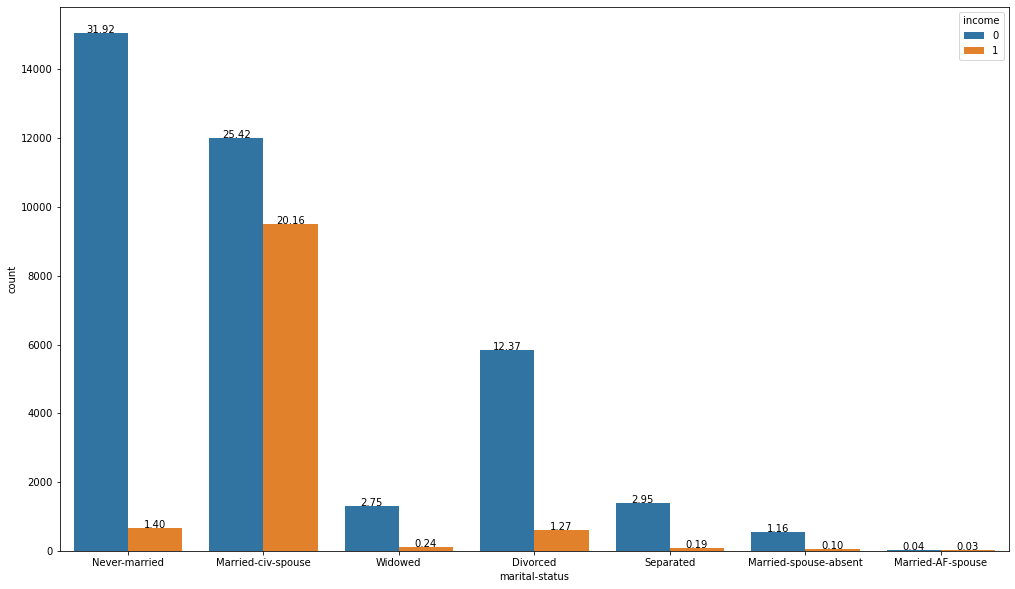

In [44]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="marital-status", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### ii. Description about plot
This countplot explain following things:

Married-civ-spouse has the highest percentage(20.44%) of falling under the income group 1(>50k).
Despite the fact that we have 16117 observation in the marital-status attribute(which is sec. highest) but only 1.5% of the people of "Never-married" earn more than 50k.
Married-spouse-absent and Married-AF-spouse has negligible contribution to the fall under income group 1.

#### iii. Hypothesis test (to test the relationship between income & marital-status)
Here, In this example
<ul>
    <li>H0(Null Hypothesis) : There is no relationship between marital-status and income.</li>
<li>H1(Alternate Hypothesis) : There is a relationship between marital-status and income.</li>

In [45]:
# contingency table
c_t = pd.crosstab(data['marital-status'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
marital-status,,
Divorced,11,1
Married-civ-spouse,24,18
Married-spouse-absent,2,1
Never-married,30,1
Separated,3,1
Widowed,2,0


In [46]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
p_value 0.0026955070813438793
[[ 9.19148936  2.80851064]
 [32.17021277  9.82978723]
 [ 2.29787234  0.70212766]
 [23.74468085  7.25531915]
 [ 3.06382979  0.93617021]
 [ 1.53191489  0.46808511]]
probability=0.950, critical=11.070, stat=18.209
Dependent (reject H0)


#### iv. Final conclusion
With the help of Chi-Squared test,

As we have rejected the H0, that there is no relationship between these two categorical variable.
We can conclude that is some dependency of "marital-status" attribute on the target variable "income"

### 9. Occupation
#### i.Plot (Relationship with income)

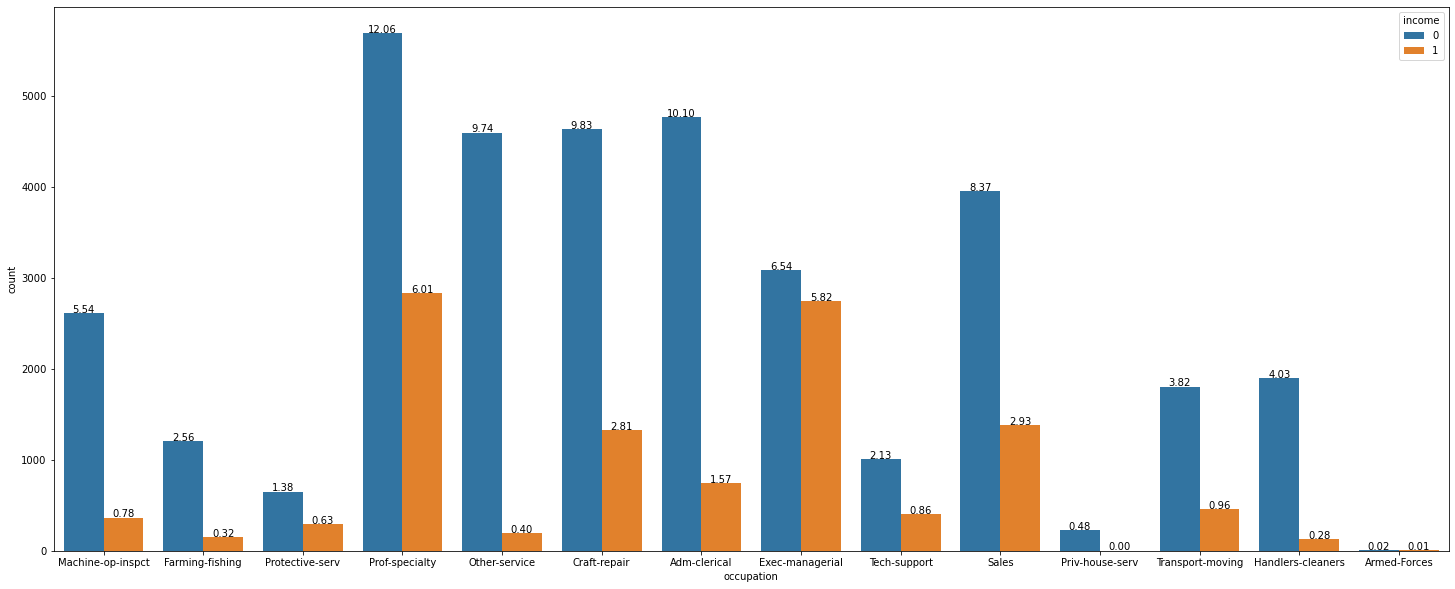

In [47]:
plt.figure(figsize=(25,10))
total = float(len(data) )

ax = sns.countplot(x="occupation", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### ii. Description about plot
This countplot explain following things:

Prof-specialty has maximum percentage that fall in both income group 0 and 1 in whole categories with 12.15% and 6.24% respectively.
There is an interesting thing to look in this plot which is no occupation has greater percentage of falling in income group 1 than the income group 0. i.e. in every occupation, people who earn less than 50k is greater than people who earn >50k.

#### iii. Hypothesis test (to test the relationship between income & occupation)
Here, In this example
<ul>
    <li>H0(Null Hypothesis) : There is no relationship between occupation and income.</li>
    <li>H1(Alternate Hypothesis) : There is a relationship between occupation and income.</li>

In [48]:
# contingency table
c_t = pd.crosstab(data['occupation'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
occupation,,
Adm-clerical,9,1
Craft-repair,7,3
Exec-managerial,8,10
Farming-fishing,1,0
Handlers-cleaners,1,0
Machine-op-inspct,8,0
Other-service,14,0
Prof-specialty,13,2
Protective-serv,0,1


In [49]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
[[ 7.65957447  2.34042553]
 [ 7.65957447  2.34042553]
 [13.78723404  4.21276596]
 [ 0.76595745  0.23404255]
 [ 0.76595745  0.23404255]
 [ 6.12765957  1.87234043]
 [10.72340426  3.27659574]
 [11.4893617   3.5106383 ]
 [ 0.76595745  0.23404255]
 [ 5.36170213  1.63829787]
 [ 3.82978723  1.17021277]
 [ 3.06382979  0.93617021]]
probability=0.950, critical=19.675, stat=23.957
Dependent (reject H0)


#### iv. Final conclusion
With the help of Chi-Squared test,

As we have rejected the H0, that there is no relationship between these two categorical variable.
We can conclude that is some dependency of "occupation" attribute on the target variable "income"

### 10.Relationship
#### i. Plot (relationship with income)

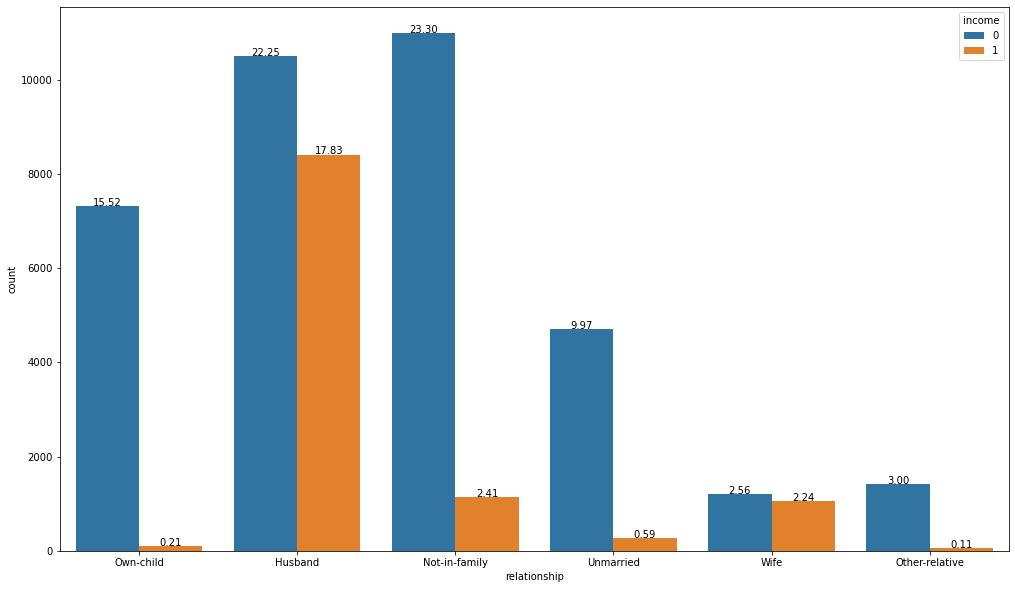

In [50]:
plt.figure(figsize=(17,10))
total = float(len(data))

ax = sns.countplot(x="relationship", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### ii. Description about plot
This countplot explain following things:

husbands has the highest percentage(18.11%) of earning more than 50k in all the other categories.
One thing to notice is that "not-in-family" has highest percentage(23.15%) to earn less than 50k but they had nearly same percentage(2.61%) as of the "wife"(2.24%) category. This comparsion is done due to fact that "wife" category has only 2.53% to fall under the income group 0.
"own-child" and "other-relative" has the minimum percentage to fall under the income group 1 i.e. 0.23% and 0.11% respectively.
There is huge difference between the percentage of fall either groups except for "husband" and "wife".

#### iii. Hypothesis test (to test the relationship between income & relationship)
Here, In this example
<ul>
<li>H0(Null Hypothesis) : Both the relationship and income variables are independent to each other.</li>
    <li>H1(Alternate Hypothesis) : There is a dependent to each other.</li>

In [51]:
# contingency table
c_t = pd.crosstab(data['relationship'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
relationship,,
Husband,21,18
Not-in-family,15,3
Other-relative,1,0
Own-child,21,0
Unmarried,11,1
Wife,3,0


In [52]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=5
[[29.87234043  9.12765957]
 [13.78723404  4.21276596]
 [ 0.76595745  0.23404255]
 [16.08510638  4.91489362]
 [ 9.19148936  2.80851064]
 [ 2.29787234  0.70212766]]
probability=0.950, critical=11.070, stat=20.874
Dependent (reject H0)


#### iv. Final conclusion
With the help of Chi-Squared test,

As we have rejected the H0, that there are independent to each other..
We can conclude that is some dependency of "relationship" attribute on the target variable "income"

### 11.Race
#### i.Plot (Relationship with income)

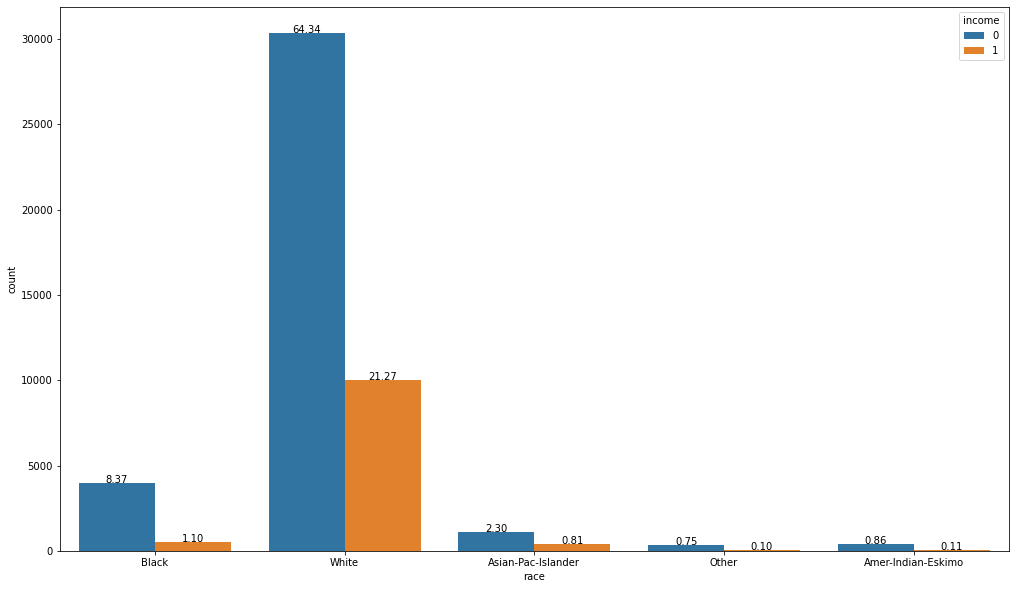

In [53]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="race", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#### ii. Description about plot
This countplot explain following things:

The relationship of "white" race with "income" can easily guess based on previous summary statistics.
There is huge difference between the percentage of fall either groups for each "race" except for the "other"(.63%) and "amer-indian-eskimo"(.74%) but this could be due the lesser number of observations for those categories.

#### iii. Hypothesis test (to test the relationship between income & race)
Here, In this example
<ul>
    <li>H0(Null Hypothesis) : There is no relationship between race and income.</li>
    <li>H1(Alternate Hypothesis) : There is a relationship between race and income.</li>

In [54]:
# contingency table
c_t = pd.crosstab(data['race'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
race,,
Asian-Pac-Islander,5,0
Black,5,2
Other,2,0
White,60,20


In [55]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
p_value 0.501730316713183
[[ 3.82978723  1.17021277]
 [ 5.36170213  1.63829787]
 [ 1.53191489  0.46808511]
 [61.27659574 18.72340426]]
probability=0.950, critical=7.815, stat=2.357
Independent (fail to reject H0)


#### iv. Final conclusion
With the help of Chi-Squared test,

As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "race" attribute on the target variable "income"

### 12. Gender
#### i. Plot (relationship with income)

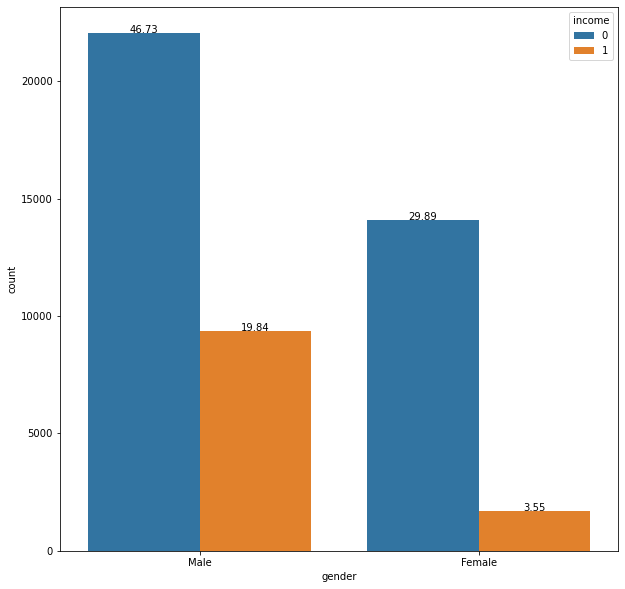

In [56]:
plt.figure(figsize=(10,10))
total = float(len(data) )

ax = sns.countplot(x="gender", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#### ii. Description about plot
This countplot explain following things:

For "female" earning more than 50k is rare with only 3.62% of all observations.
But for male, 20.31% of all people earn more than 50k .

#### iii. Hypothesis test (to test the relationship between income & gender)
Here, In this example
<ul>
    <li>H0(Null Hypothesis) : There is no relationship between gender and income.</li>
    <li>H1(Alternate Hypothesis) : There is a relationship between gender and income</li>

In [57]:
# contingency table
c_t = pd.crosstab(data['gender'].sample(frac=0.002, replace=True, random_state=1),data['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,0,1
gender,,
Female,29,1
Male,43,21


In [58]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=1
p_value 0.003909409357411635
[[22.9787234  7.0212766]
 [49.0212766 14.9787234]]
probability=0.950, critical=3.841, stat=8.325
Dependent (reject H0)


#### iv. Final conclusion
With the help of Chi-Squared test,

As we have rejected the H0, that there is no relationship between these two categorical variable.
We can conclude that is some dependency of "gender" attribute on the target variable "income"


### Conclusion of complete EDA
Feature Removal:

1. Education num and education are giving similar information.
2. Using capital-gain and capital loss , we can make new variable called capital-change.

Outliers Summary:

1. Capital gain of 99999 doesn't follow any pattern and from graph above it clearly distinguishes to be an outlier.
2. Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is rare.


Attributes affecting the target feature:
<ul>
    <li>Age</li>
    <li>Hours per week</li>
    <li>capital-change</li>
    <li>workclass</li>
    <li>Education</li>
    <li>marital-status</li>
    <li>occupation</li>
    <li>relationship</li>
    <li>race</li>
    <li>gender</li>
    <li>native-country</li>

### Removing the outliers
### 1. Age

C:\Users\DEBLEENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


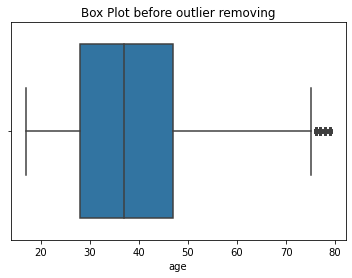

C:\Users\DEBLEENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


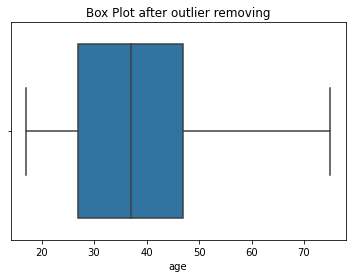

In [59]:
sns.boxplot(data['age'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(data, 'age')
sns.boxplot(data['age'])
plt.title("Box Plot after outlier removing")
plt.show()


### 2.fnlwgt

C:\Users\DEBLEENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


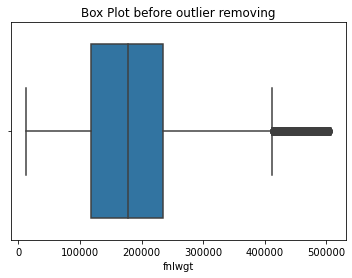

C:\Users\DEBLEENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


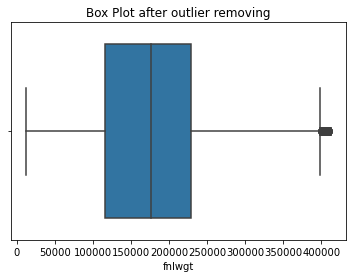

In [60]:
sns.boxplot(data['fnlwgt'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(data, 'fnlwgt')
sns.boxplot(data['fnlwgt'])
plt.title("Box Plot after outlier removing")
plt.show()

### Feature engineering

In [65]:
data_cp=data.copy()

In [66]:
#dropping based on uniquness of data from the dataset 
data_cp.drop(['educational-num','age', 'hours-per-week', 'fnlwgt', 'capital-gain','capital-loss', 'native-country'], axis=1, inplace=True)

In [67]:
data_cp.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0


In [68]:
#gender
data_cp['gender'] = data_cp['gender'].map({'Male': 0, 'Female': 1}).astype(int)
#race
data_cp['race'] = data_cp['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
data_cp['marital-status'] = data_cp['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)


In [69]:
#education
data_cp['education'] = data_cp['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
#occupation
data_cp['occupation'] = data_cp['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
#relationship
data_cp['relationship'] = data_cp['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [70]:
data_cp.replace({'workclass':{'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3,
                              'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6,'Never-worked':7}},inplace=True)

In [71]:
data_cp.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,5,11,5,6,5,0,0,0
1,5,3,2,1,4,3,0,0
2,4,9,2,14,4,3,0,1
3,5,0,2,6,4,0,0,1
4,5,0,5,5,5,3,1,0


### Machine Learning
Here our goal is to predict the income which can either be 0 or 1 ( less than 50K or greater than 50K) and we want to identify a relation between our output (income) and remaining independent features ( education, workclass, gender, etc. ). This scenario is a classic example of Classification (classify whether income is <50K or more ).
Here we opt for the Supervised Learning Machine Learning techniques. 
### 1. Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [73]:
df_x = pd.DataFrame(np.c_[data_cp['relationship'], data_cp['education'], data_cp['race'],data_cp['occupation'],data_cp['gender'],
                          data_cp['marital-status'],data_cp['workclass']], columns = ['relationship','education','race','occupation','gender','marital-status','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(data_cp.income)

In [74]:
reg = LogisticRegression()

In [75]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [76]:
reg.fit(x_train, y_train)

C:\Users\DEBLEENA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [77]:
y_pred = reg.predict(x_test)

In [78]:
from sklearn import metrics
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7725774555042848


### 2. Gaussian Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_predNB = classifier.predict(x_test)

C:\Users\DEBLEENA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_predNB)
cm = confusion_matrix(y_test, y_predNB)

In [83]:
print(ac)
print(cm)

0.7276203032300593
[[8507 3121]
 [1011 2531]]


### 3. Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [115]:
rfc_model.fit(x_train, y_train)

<ipython-input-115-9ffe3543d137>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(x_train, y_train)


RandomForestClassifier()

In [116]:
y_predrf=rfc_model.predict(x_test)

In [117]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))

Accuracy: 0.8231377719182598


### 4.Descision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

y_preddt=clf.predict(x_test)

In [110]:
print("Accuracy:",metrics.accuracy_score(y_test, y_preddt))

Accuracy: 0.8205669083717865


### 5. Support Vector Machines

In [111]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=1)
classifier.fit(x_train,y_train)

y_predsvm=classifier.predict(x_test)

C:\Users\DEBLEENA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [112]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predsvm))

Accuracy: 0.7908371786420567


### Models Building and Evaluation

In [113]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(df_x, df_y, 5)

C:\Users\DEBLEENA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DEBLEENA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DEBLEENA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\DEBLEENA\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.764505,0.768899,0.823460,0.827333,0.728740,Random Forest
Precision,0.496839,0.535956,0.653660,0.664904,0.451359,Random Forest
Recall,0.176261,0.124328,0.529254,0.535085,0.715607,Gaussian Naive Bayes
F1 Score,0.259847,0.201803,0.584880,0.592919,0.553560,Random Forest
